# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [347]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import urllib2
import numpy as np
import time
from time import sleep
import csv
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split 

%matplotlib inline

In [3]:
## YOUR CODE HERE

In [4]:
## YOUR CODE HERE

# I did all of my data scraping in another workbook, but here is the code I used:

In [13]:
## 50,000

#company_name_50000 = []
# location_50000 = []
# jobTitle_50000 = []
# salaryBase_50000 = []
# description_50000 = []

# for page in range(0, 501, 10):
#     website = 'http://www.indeed.com/jobs?q=data+scientist+%2450%2C000&start=' + str(page)
#     soup = BeautifulSoup(urllib2.urlopen(website))
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('span', {'itemprop': 'name'}):
#             company_name_50000.append(j.get_text().encode('utf-8'))   ## make sure this encode works
#             salaryBase_50000.append(50000)
#     for area in soup('div', {'class': ' row result'}):
#         for place in area('span', {'itemprop': 'addressLocality'}):
#             location_50000.append(place.get_text().encode('utf-8'))
#     for pea in soup('div', {'class': ' row result'}):
#         for j in pea('a', {'data-tn-element': 'jobTitle'}):
#             jobTitle_50000.append(j.get_text().encode('utf-8'))
#     for descr in soup('div', {'class': ' row result'}):
#         for j in descr('span', {'class': 'summary'}):
#             description_50000.append(j.get_text().encode('utf-8'))
#     print "You have looked through %s records" % page
#     sleep(5)
    
# dictionary_50000 = {'company': company_name_50000,
#                    'location': location_50000,
#                    "title" : jobTitle_50000,
#                    "salary" : salaryBase_50000,
#                    'description': description_50000}

# df50000 = pd.DataFrame(dictionary_50000)



In [14]:
# ## 70,000

# company_name_70000 = []
# location_70000 = []
# jobTitle_70000 = []
# salaryBase_70000 = []
# description_70000 = []

# for page in range(0, 501, 10):
#     website = 'http://www.indeed.com/jobs?q=data+scientist+%2470%2C000&start=' + str(page)
#     soup = BeautifulSoup(urllib2.urlopen(website))
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('span', {'itemprop': 'name'}):
#             company_name_70000.append(j.get_text())
#             salaryBase_70000.append(70000)
#     for area in soup('div', {'class': ' row result'}):
#         for place in area('span', {'itemprop': 'addressLocality'}):
#             location_70000.append(place.get_text())
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('a', {'data-tn-element': 'jobTitle'}):
#             jobTitle_70000.append(j.get_text())
#     for descr in soup('div', {'class': ' row result'}):
#         for j in descr('span', {'class': 'summary'}):
#             description_70000.append(j.get_text().encode('utf-8'))
#     print "You have looked through %s records" % page
#     sleep(5)
    
# dictionary_70000 = {'company': company_name_70000,
#                    'location': location_70000,
#                    "title" : jobTitle_70000,
#                    "salary" : salaryBase_70000,
#                    'description': description_70000}

# df70000 = pd.DataFrame(dictionary_70000)

In [15]:
# # 90,000


# company_name_90000 = []
# location_90000 = []
# jobTitle_90000 = []
# salaryBase_90000 = []
# description_90000 = []

# for page in range(0, 501, 10):
#     website = 'http://www.indeed.com/jobs?q=data+scientist+%2490%2C000&start=' + str(page)  
#     soup = BeautifulSoup(urllib2.urlopen(website))
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('span', {'itemprop': 'name'}):
#             company_name_90000.append(j.get_text())
#             salaryBase_90000.append(90000)
#     for area in soup('div', {'class': ' row result'}):
#         for place in area('span', {'itemprop': 'addressLocality'}):
#             location_90000.append(place.get_text())
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('a', {'data-tn-element': 'jobTitle'}):
#             jobTitle_90000.append(j.get_text())
#     for descr in soup('div', {'class': ' row result'}):
#         for j in descr('span', {'class': 'summary'}):
#             description_90000.append(j.get_text().encode('utf-8'))
#     print "You have looked through %s records" % page
#     sleep(5)
    
# dictionary_90000 = {'company': company_name_90000,
#                    'location': location_90000,
#                    "title" : jobTitle_90000,
#                    "salary" : salaryBase_90000,
#                    'description': description_90000}

# df90000 = pd.DataFrame(dictionary_90000)

In [16]:
# ## 120,000

# company_name_120000 = []
# location_120000 = []
# jobTitle_120000 = []
# salaryBase_120000 = []
# description_120000 = []

# for page in range(0, 501, 10):
#     website = 'http://www.indeed.com/jobs?q=data+scientist+%24120%2C000&start=' + str(page)
#     soup = BeautifulSoup(urllib2.urlopen(website))
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('span', {'itemprop': 'name'}):
#             company_name_120000.append(j.get_text())
#             salaryBase_120000.append(120000)
#     for area in soup('div', {'class': ' row result'}):
#         for place in area('span', {'itemprop': 'addressLocality'}):
#             location_120000.append(place.get_text())
#     for i in soup('div', {'class': ' row result'}):
#         for j in i('a', {'data-tn-element': 'jobTitle'}):
#             jobTitle_120000.append(j.get_text())
#     for descr in soup('div', {'class': ' row result'}):
#         for j in descr('span', {'class': 'summary'}):
#             description_120000.append(j.get_text().encode('utf-8'))
#     print "You have looked through %s records" % page
#     sleep(5)
    
# dictionary_120000 = {'company': company_name_120000,
#                    'location': location_120000,
#                    "title" : jobTitle_120000,
#                    "salary" : salaryBase_120000,
#                    'description': description_120000}

# df120000 = pd.DataFrame(dictionary_120000)

## Export data into a .CSV

In [18]:
# ## this is the code I used:

# path_d = '/Users/christophereppig/'
# indeed_data.to_csv('indeed_data.csv', encoding='utf-8')

In [127]:
def examine_coefficients(model, df):
   df = pd.DataFrame(
       { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
   ).sort_values(by='Coefficient')
   return df[df.Coefficient !=0 ]

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [3]:
%pwd

u'/Users/christophereppig/DSI-CHI-1/projects/weekly-projects/project-04/starter-code'

In [130]:
## load the dataset
indeed = pd.read_csv('~/Datasets/indeed_data.csv')

In [5]:
indeed.head()

,Unnamed: 0,company,description,location,salary,title
0,0,\n\n Pearson,\nDrawing upon the extensive regional and func...,Oregon,50000,Predictive Modeling Analyst
1,1,\n\n Federal Reserve Bank of New York,"\nJunior Data Scientist, Data & Statistics - D...","New York, NY",50000,"Junior Data Scientist, Data & Statistics - Dat..."
2,2,\n\n Labcorp,\nParticipates in all aspects of business inte...,"Long Beach, CA",50000,Statistical Analyst
3,3,\n\n Pearson,\nParticipates in all aspects of business inte...,North Carolina,50000,Statistical Analyst
4,4,\n Jet,\nAs Data Scientist you will apply machine lea...,"Hoboken, NJ",50000,"Data Scientist, Search"


In [72]:
indeed.shape

(1836, 20)

In [138]:
## cleaning data

indeed['company'] = indeed['company'].apply(lambda x: x.strip('\n'))
indeed['description'] = indeed['description'].apply(lambda x: x.strip('\n'))
indeed['high_salary'] = indeed['salary'].apply(lambda x: 1 if x > 80000 else 0)
indeed['company'] = indeed['company'].apply(lambda x: x.strip(' '))
indeed['company'] = indeed['company'].apply(lambda x: x.lower())
indeed['title'] = indeed['title'].apply(lambda x: x.lower())
indeed['description'] = indeed['description'].apply(lambda x: x.lower())
indeed['location'] = indeed['location'].apply(lambda x: x.lower())



In [139]:
## dummy variables for four job titles

indeed['is_data_scientist'] = indeed['title'].apply(lambda x: 1 if 'data scientist' in x else 0)
indeed['analyst'] = indeed['title'].apply(lambda x: 1 if 'analyst' in x else 0)

## these titles need to combine more than one term in each one. A job for a senior data scientist
## could be listed as "senior", "sr", or "sr."
indeed['senior'] = indeed['title'].apply(lambda x: 1 if ('senior' in x) or ('sr' in x) or ('sr.' in x) else 0)
indeed['junior'] = indeed['title'].apply(lambda x: 1 if ('junior' in x) or ('jr' in x) or ('jr.' in x) else 0)

In [110]:
indeed['location'].value_counts()    ## checking the most common cities

chicago, il                                          129
new york, ny                                          98
san francisco, ca                                     87
palo alto, ca                                         48
seattle, wa                                           44
washington, dc                                        35
boston, ma                                            31
santa clara valley, ca                                24
mountain view, ca                                     24
atlanta, ga                                           21
cambridge, ma                                         21
santa clara, ca                                       20
mclean, va                                            20
san jose, ca                                          20
sunnyvale, ca                                         19
st. louis, mo                                         19
dearborn, mi                                          18
united states                  

In [140]:
## making dummy variables for some important cities

indeed['chicago'] = indeed['location'].apply(lambda x: 1 if 'chicago' in x else 0)
indeed['new_york'] = indeed['location'].apply(lambda x: 1 if 'new york' in x else 0)
indeed['sanfransisco'] = indeed['location'].apply(lambda x: 1 if 'san fransisco' in x else 0)
indeed['palo_alto'] = indeed['location'].apply(lambda x: 1 if 'palo alto' in x else 0)
indeed['seattle'] = indeed['location'].apply(lambda x: 1 if 'seattle' in x else 0)
indeed['dc'] = indeed['location'].apply(lambda x: 1 if 'washington, dc' in x else 0)
indeed['boston'] = indeed['location'].apply(lambda x: 1 if 'boston' in x else 0)
indeed['atlanta'] = indeed['location'].apply(lambda x: 1 if 'atlanta' in x else 0)
indeed['austin'] = indeed['location'].apply(lambda x: 1 if 'austin' in x else 0)
indeed['stlouis'] = indeed['location'].apply(lambda x: 1 if 'st. louis' in x else 0)
indeed['miami'] = indeed['location'].apply(lambda x: 1 if 'miami' in x else 0)
indeed['dallas'] = indeed['location'].apply(lambda x: 1 if 'dallas' in x else 0)
indeed['denver'] = indeed['location'].apply(lambda x: 1 if 'denver' in x else 0)
indeed['portland'] = indeed['location'].apply(lambda x: 1 if 'portland' in x else 0)
indeed['philadelphia'] = indeed['location'].apply(lambda x: 1 if 'philadelphia' in x else 0)
indeed['pittsburgh'] = indeed['location'].apply(lambda x: 1 if 'pittsburgh' in x else 0)
indeed['la'] = indeed['location'].apply(lambda x: 1 if 'los angeles' in x else 0)
indeed['santaclara'] = indeed['location'].apply(lambda x: 1 if 'santa clara valley' in x else 0)
indeed['mountainview'] = indeed['location'].apply(lambda x: 1 if 'mountain view' in x else 0)
indeed['mclean'] = indeed['location'].apply(lambda x: 1 if 'mclean' in x else 0)
indeed['sanjose'] = indeed['location'].apply(lambda x: 1 if 'san jose' in x else 0)
indeed['sunnyvale'] = indeed['location'].apply(lambda x: 1 if 'sunnyvale' in x else 0)
indeed['dearborn'] = indeed['location'].apply(lambda x: 1 if 'dearborn' in x else 0)








In [108]:
len(set(indeed['location']))

392

In [74]:
indeed.head()

,Unnamed: 0,company,description,location,salary,title,high_salary,is_data_scientist,chicago,new_york,...,palo_alto,seattle,dc,boston,atlanta,austin,stlouis,analyst,senior,junior
0,0,pearson,drawing upon the extensive regional and functi...,oregon,50000,predictive modeling analyst,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,federal reserve bank of new york,"junior data scientist, data & statistics - dat...","new york, ny",50000,"junior data scientist, data & statistics - dat...",0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2,labcorp,participates in all aspects of business intell...,"long beach, ca",50000,statistical analyst,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,pearson,participates in all aspects of business intell...,north carolina,50000,statistical analyst,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,jet,as data scientist you will apply machine learn...,"hoboken, nj",50000,"data scientist, search",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
indeed['title'].value_counts()    ## checking how many job postings there are for different titles

data scientist                                                     511
senior data scientist                                               76
principal data scientist                                            23
machine learning engineer                                           16
sr. data scientist                                                  15
machine learning data scientist                                     12
lead data scientist                                                 12
sr data scientist                                                   11
statistical analyst                                                 10
machine learning research scientist                                 10
data engineer                                                       10
data scientist ii                                                   10
machine learning scientist                                           9
data scientist, analytics                                            9
chief 

In [38]:
indeed.columns

Index([u'Unnamed: 0', u'company', u'description', u'location', u'salary',
       u'title', u'high_salary', u'is_data_scientist', u'chicago', u'new_york',
       u'sanfransisco', u'palo_alto', u'seattle', u'dc', u'boston', u'atlanta',
       u'austin', u'stlouis', u'analyst', u'senior'],
      dtype='object')

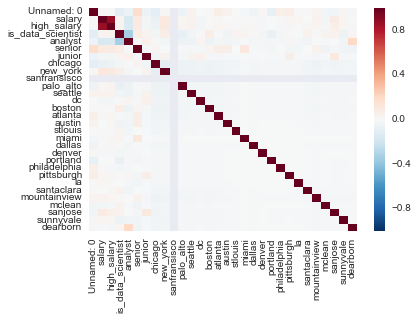

In [323]:
## preliminary correlation table to see what variables might be useful. 
## There isn't much in here that's worth looking at. 

sb.heatmap(indeed.corr())

In [112]:
indeed.columns

Index([u'Unnamed: 0', u'company', u'description', u'location', u'salary',
       u'title', u'high_salary', u'is_data_scientist', u'chicago', u'new_york',
       u'sanfransisco', u'palo_alto', u'seattle', u'dc', u'boston', u'atlanta',
       u'austin', u'stlouis', u'analyst', u'senior', u'junior', u'miami',
       u'dallas', u'denver', u'portland', u'philadelphia', u'pittsburgh',
       u'la', u'santaclara', u'mountainview', u'mclean', u'sanjose',
       u'sunnyvale', u'dearborn'],
      dtype='object')

In [77]:
indeed['company'].value_counts() ## checking which companies have the highest number of job postings

microsoft                                     29
walmart ecommerce                             28
apple                                         26
capital one                                   25
ibm kenexa                                    20
google                                        18
facebook                                      16
pearson                                       15
the nielsen company                           14
booz allen hamilton                           14
jpmorgan chase                                12
cisco systems, inc.                           11
coupang                                       11
civis analytics                               11
kpmg                                          11
ge transportation                             11
amazon corporate llc                          10
uber                                          10
aig                                           10
walmart                                       10
workbridge associate

## Model 1: Initial hand-picked model

In [41]:
logmodel = LogisticRegression()

In [233]:
## this model uses features that I thought would be predictive. It includes major cities, and basic job descriptors.

y1 = indeed['high_salary']
x1 = indeed[[u'chicago', u'new_york', 'is_data_scientist', 'analyst', 'senior',
       u'sanfransisco', u'palo_alto', u'seattle', u'dc', u'boston', u'atlanta',
       u'austin', u'stlouis', u'miami',
       u'dallas', u'denver', u'portland', u'philadelphia', u'pittsburgh',
       u'la', u'santaclara', u'mountainview', u'mclean', u'sanjose',
       u'sunnyvale', u'dearborn']]
model_1 = logmodel.fit(x1,y1)

model_1.score(x1,y1)

0.579520697167756

In [232]:
predicted_class = model_1.predict(x1)
confusion_matrix(y1, predicted_class)

array([[581, 337],
       [435, 483]])

In [234]:
print classification_report(y1, predicted_class)

             precision    recall  f1-score   support

          0       0.57      0.63      0.60       918
          1       0.59      0.53      0.56       918

avg / total       0.58      0.58      0.58      1836



In [235]:
examine_coefficients(model_1, x1)

,Coefficient,Feature
3,-1.254548,analyst
15,-0.380965,denver
17,-0.352927,philadelphia
22,-0.227496,mclean
0,-0.222889,chicago
8,-0.186267,dc
2,-0.112180,is_data_scientist
16,0.006742,portland
9,0.032473,boston
11,0.039671,austin


In [324]:
## checking the number of companies that have postings
## there are too many companies to dummy them all out

len(set(indeed['company'])) 

691

In [325]:
## extracting the 50 most common words used in the company names
v2 = CountVectorizer(            
    binary=True, 
    stop_words='english',
    max_features=50,
)

dfx2 = v.fit_transform(indeed['company']).todense()
dfx2 = pd.DataFrame(dfx2, columns=v.get_feature_names())
dfx2.head()

,allen,amazon,america,analytics,apple,associates,bank,booz,capital,chase,...,services,solutions,systems,technologies,technology,transportation,uber,university,usa,walmart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
dfx2.columns

Index([u'allen', u'amazon', u'america', u'analytics', u'apple', u'associates',
       u'bank', u'booz', u'capital', u'chase', u'cisco', u'civis', u'com',
       u'company', u'consulting', u'corporate', u'corporation', u'coupang',
       u'digital', u'ecommerce', u'facebook', u'financial', u'ge', u'google',
       u'group', u'hamilton', u'health', u'ibm', u'jpmorgan', u'kenexa',
       u'kpmg', u'laboratory', u'llc', u'microsoft', u'national', u'nielsen',
       u'partners', u'pearson', u'research', u'resources', u'services',
       u'solutions', u'systems', u'technologies', u'technology',
       u'transportation', u'uber', u'university', u'usa', u'walmart'],
      dtype='object')

In [84]:
model3_vars = dfx2.columns

## Model 3: Company names

In [85]:
logistic3 = LogisticRegression()     ## this model uses the most common words taken from the list of companies
                                     ## to predict salary
y3 = indeed['high_salary']
x3 = dfx2[model3_vars]

model_3 = logistic2.fit(x3,y3)

model_3.score(x3,y3)

0.55174291938997821

In [128]:
examine_coefficients(model_3, x3)

,Coefficient,Feature
1,-1.046419,amazon
0,-0.937693,allen
4,-0.620179,apple
46,-0.585413,uber
31,-0.561548,laboratory
28,-0.383672,jpmorgan
47,-0.358947,university
34,-0.323429,national
6,-0.301051,bank
22,-0.232714,ge


In [133]:
## extracting the 50 most common words in the job titles

v3 = CountVectorizer(            
    binary=True, 
    stop_words='english',
    max_features=50,
)

dfx3 = v.fit_transform(indeed['title']).todense()
dfx3 = pd.DataFrame(dfx3, columns=v.get_feature_names())
dfx3.head()

,analysis,analyst,analytics,applied,associate,big,business,chief,consultant,data,...,senior,services,software,solutions,sr,staff,statistical,statistician,statistics,technology
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [116]:
model4_vars = dfx3.columns

## Model 4: Job titles

In [117]:
## predicting salary by the 50 most common words in 'title'

logistic4 = LogisticRegression()     

y4 = indeed['high_salary']
x4 = dfx3[model4_vars]

model_4 = logistic2.fit(x4,y4)

model_4.score(x4,y4)

0.58769063180827885

In [131]:
predicted_class4 = model_4.predict(x4)
confusion_matrix(y4, predicted_class4)

array([[669, 249],
       [508, 410]])

In [126]:
examine_coefficients(model_4, x4)

,Coefficient,Feature
1,-1.046419,analyst
0,-0.937693,analysis
4,-0.620179,associate
46,-0.585413,statistical
31,-0.561548,programmer
28,-0.383672,predictive
47,-0.358947,statistician
34,-0.323429,research
6,-0.301051,business
22,-0.232714,machine


#### Thought experiment: What is the baseline accuracy for this model?

In [10]:
## 50%, since half of my data points are high salary and the other half are low. My division is $80k.

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [17]:
## YOUR CODE HERE

In [18]:
## YOUR CODE HERE

## Model 5: Job location

In [141]:
## 50 most common words in the location column

v5 = CountVectorizer(            
    binary=True, 
    stop_words='english',
    max_features=50,
)

dfx5 = v5.fit_transform(indeed['location']).todense()
dfx5 = pd.DataFrame(dfx5, columns=v5.get_feature_names())
dfx5.head()

,alto,area,atlanta,austin,boston,bruno,ca,cambridge,chicago,city,...,south,sunnyvale,tx,ut,va,valley,view,wa,washington,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
location_names = dfx5.columns

In [162]:
y5 = indeed['high_salary']
x5 = dfx5[location_names]
model_5 = logmodel.fit(x5,y5)

model_5.score(x5,y5)

0.59041394335511987

In [163]:
predicted_class5 = model_5.predict(x5)
confusion_matrix(y5, predicted_class5)

array([[560, 358],
       [394, 524]])

In [145]:
examine_coefficients(model_5, x5)

,Coefficient,Feature
12,-0.696522,dearborn
16,-0.390377,il
35,-0.356687,park
38,-0.318401,santa
11,-0.312718,dc
5,-0.209197,bruno
9,-0.159758,city
21,-0.157119,market
4,-0.146011,boston
22,-0.134543,md


In [168]:
## 50 most common words in the description column

v6 = CountVectorizer(            
    binary=True, 
    stop_words='english',
    max_features=50,
)

dfx6 = v6.fit_transform(indeed['description']).todense()
dfx6 = pd.DataFrame(dfx6, columns=v6.get_feature_names())
dfx6.head()

,advanced,algorithms,analysis,analytics,analyzing,big,business,complex,data,design,...,sources,statistical,team,techniques,tools,using,visualization,work,working,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
model7_vars = dfx6.columns

## Model 7: Job Descriptions

In [228]:
## this model predicts salary with the 50 most common words extracted from the job descriptions

y7 = indeed['high_salary']
x7 = dfx6[model7_vars]
model_7 = logmodel.fit(x7,y7)

model_7.score(x7,y7)

0.5816993464052288

In [230]:
predicted_class7 = model_7.predict(x7)
confusion_matrix(y7, predicted_class7)

## this model is relatively balanced on its false negatives and false positives

array([[552, 366],
       [402, 516]])

In [172]:
examine_coefficients(model_7, x7)

,Coefficient,Feature
35,-0.307486,seeking
20,-0.305518,learning
2,-0.304565,analysis
18,-0.290401,knowledge
28,-0.287439,research
4,-0.183634,analyzing
29,-0.142856,responsible
23,-0.138315,management
6,-0.128945,business
3,-0.121291,analytics


## Model 6: All extracted features

In [174]:
model_6_vars = extracted_features.columns

In [236]:
## this model uses the 50 words each extracted from the job title, location, company name, and description

y6 = indeed['high_salary']
x6 = extracted_features[model_6_vars]
model_6 = logmodel.fit(x6,y6)

model_6.score(x6,y6)

0.6470588235294118

In [176]:
## this model is very balanced on false negatives and false positives.

predicted_class6 = model_6.predict(x6)
confusion_matrix(y6, predicted_class6)

array([[583, 335],
       [313, 605]])

In [178]:
print classification_report(y6, predicted_class6)

             precision    recall  f1-score   support

          0       0.65      0.64      0.64       918
          1       0.64      0.66      0.65       918

avg / total       0.65      0.65      0.65      1836



In [177]:
examine_coefficients(model_6, x6)

,Coefficient,Feature
60,-1.013750,analyst
57,-0.982718,walmart
6,-0.871444,apple
55,-0.808681,university
43,-0.771218,resources
100,-0.673285,programmer
65,-0.661815,associate
22,-0.524673,facebook
184,-0.492116,analysis
58,-0.492116,analysis


In [241]:
## try l1 and l2 regularization on this model

In [318]:
## Since model 6 is the best model, I will test it for over-fit.

x_train, x_test, y_train, y_test = train_test_split(x6,y6)


In [319]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1377, 254), (459, 254), (1377,), (459,))

In [320]:
## the training model has a relatively good score


logistic_tts = LogisticRegression()
model_tts = logistic_tts.fit(x_train, y_train)
model_tts.score(x_train, y_train)

0.65867828612926649

In [237]:
## this model appears to be quite over-fit. This is unsurprising, 
## given that there are only twice as many rows of data in the test set
## as there are variables

model_tts.score(x_test, y_test)

0.53594771241830064

In [173]:
extracted_features = pd.concat([dfx2, dfx3, dfx5, dfx6], axis=1, join_axes=[dfx2.index])

In [283]:
dfx23 = dfx2.join(dfx3, lsuffix='_2', rsuffix='_3')

In [284]:
dfx235 = dfx23.join(dfx5, lsuffix='_23', rsuffix='_5')

In [285]:
dfx2356 = dfx235.join(dfx6, lsuffix='_235', rsuffix='6')

## Model 8a

In [344]:
## this is a hand-picked model that uses the variables from the previous models that have
## the best coefficients for predicting high salary. This model uses L1 regularization.

model8a = LogisticRegression(penalty='l1', C=0.1)
y8a = indeed['high_salary']
x8a = dfx2356[['allen', 'amazon', 'analysis_235', 'analyst', 'apple', 'associate', 
                'atlanta', 'big_235', 'ca', 'join',
                'chicago', 'chief', 'clara', 'company', 'consulting', 
                'data_235', 'dc', 'dearborn', 'director', 'engineer', 'engineering6', 
                'facebook', 'google', 'help', 'jose', 'kenexa', 
                'knowledge', 'laboratory', 'lead', 'learning_235', 'ma', 'machine_235', 
                'manager', 'mi', 'microsoft', 'new_235', 'park', 'principal', 'programmer',
                'quantitative', 'research', 'santa', 'scale', 'scientists_235', 'seattle',
                'seeking', 'senior_235', 'services_3', 'solutions', 'sr', 'staff', 'statistical_235', 
                'technology_3', 'transportation', 'uber', 'working', 'york', 'il', 'booz','bruno']]

model_8a = model8a.fit(x8a,y8a)

model_8a.score(x8a,y8a)


0.59259259259259256

In [346]:
examine_coefficients(model_8a, x8a)

,Coefficient,Feature
3,-0.880608,analyst
57,-0.034655,il
56,0.002745,york
46,0.074272,senior_235
19,0.076789,engineer
37,0.103019,principal
8,0.307551,ca
35,0.501763,new_235


In [327]:
## Model 8b is the same as 8a, but uses L2 regularization

model8b = LogisticRegression(penalty='l2', C=0.1)
y8b = indeed['high_salary']
x8b = dfx2356[['allen', 'amazon', 'analysis_235', 'analyst', 'apple', 'associate', 
                'atlanta', 'big_235', 'ca', 'join',
                'chicago', 'chief', 'clara', 'company', 'consulting', 
                'data_235', 'dc', 'dearborn', 'director', 'engineer', 'engineering6', 
                'facebook', 'google', 'help', 'jose', 'kenexa', 
                'knowledge', 'laboratory', 'lead', 'learning_235', 'ma', 'machine_235', 
                'manager', 'mi', 'microsoft', 'new_235', 'park', 'principal', 'programmer',
                'quantitative', 'research', 'santa', 'scale', 'scientists_235', 'seattle',
                'seeking', 'senior_235', 'services_3', 'solutions', 'sr', 'staff', 'statistical_235', 
                'technology_3', 'transportation', 'uber', 'working', 'york', 'il', 'booz','bruno']]

model_8b = model8b.fit(x8b,y8b)

model_8b.score(x8b,y8b)



0.62200435729847492

In [341]:
examine_coefficients(model_8b, x8b)

,Coefficient,Feature
3,-0.797560,analyst
51,-0.365429,statistical_235
2,-0.291609,analysis_235
5,-0.283504,associate
38,-0.230578,programmer
57,-0.180361,il
21,-0.158557,facebook
36,-0.155687,park
26,-0.155665,knowledge
45,-0.133522,seeking


In [321]:
predicted_class8b = model_8b.predict(x8b)
confusion_matrix(y8b, predicted_class8b)

array([[569, 349],
       [345, 573]])

In [322]:
print classification_report(y8b, predicted_class8b)

             precision    recall  f1-score   support

          0       0.62      0.62      0.62       918
          1       0.62      0.62      0.62       918

avg / total       0.62      0.62      0.62      1836



In [302]:
## do test/train/split on model 8

In [309]:
x_train8b, x_test8b, y_train8b, y_test8b = train_test_split(x8b,y8b)



In [310]:
## Since model 6 is the best model, I will test it for over-fit.

x_train8b, x_test8b, y_train8b, y_test8b = train_test_split(x8b,y8b)


In [311]:
x_train8b.shape, x_test8b.shape, y_train8b.shape, y_test8b.shape

((1377, 60), (459, 60), (1377,), (459,))

In [312]:
## the training model has a relatively good score


logistic_tts8b = LogisticRegression()
model_tts8b = logistic_tts8b.fit(x_train8b, y_train8b)
model_tts8b.score(x_train8b, y_train8b)

0.62890341321713872

In [314]:
## Model 8b seems to have a good level of fit, even if it is not especially predictive. 

model_tts8b.score(x_test8b, y_test8b)

0.579520697167756

In [20]:
## YOUR CODE HERE

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

## Model 9: Grid search

In [328]:


parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

In [329]:
GSmodel = LogisticRegression()
grid_search = GridSearchCV(estimator=GSmodel,
                          param_grid=parameters,  
                          cv=6)

In [330]:
grid_search

GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [331]:
ygs = indeed['high_salary']
xgs = x6 = extracted_features[model_6_vars]
grid_search.fit(xgs,ygs)

GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [332]:
grid_search.best_score_

0.57407407407407407

In [333]:
grid_search.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [334]:
grid_search.best_estimator_.fit(xgs, ygs)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [335]:
grid_search.best_estimator_.score(xgs, ygs)

0.61928104575163401

In [336]:
predictionsGS = grid_search.best_estimator_.predict(xgs)

confusion_matrix(ygs, predictionsGS)

array([[541, 377],
       [322, 596]])

In [202]:
print classification_report(ygs, predictionsGS)

             precision    recall  f1-score   support

          0       0.63      0.59      0.61       918
          1       0.61      0.65      0.63       918

avg / total       0.62      0.62      0.62      1836



## ROC plot for model 8b

(array([ 0.        ,  0.00429185,  0.00429185,  0.00858369,  0.01287554,
        0.01287554,  0.02145923,  0.02145923,  0.02145923,  0.02575107,
        0.02575107,  0.03004292,  0.03004292,  0.03862661,  0.04291845,
        0.0472103 ,  0.0472103 ,  0.0472103 ,  0.05150215,  0.05150215,
        0.05579399,  0.05579399,  0.06008584,  0.08583691,  0.09012876,
        0.0944206 ,  0.0944206 ,  0.09871245,  0.09871245,  0.11587983,
        0.11587983,  0.12017167,  0.12017167,  0.12446352,  0.12446352,
        0.12875536,  0.12875536,  0.12875536,  0.13304721,  0.13304721,
        0.13733906,  0.1416309 ,  0.1416309 ,  0.14592275,  0.14592275,
        0.15021459,  0.15021459,  0.15879828,  0.15879828,  0.15879828,
        0.16309013,  0.16309013,  0.17596567,  0.18025751,  0.18025751,
        0.18454936,  0.18454936,  0.1888412 ,  0.1888412 ,  0.19313305,
        0.19313305,  0.19313305,  0.19742489,  0.22746781,  0.22746781,
        0.23175966,  0.24034335,  0.24892704,  0.25751073,  0.2

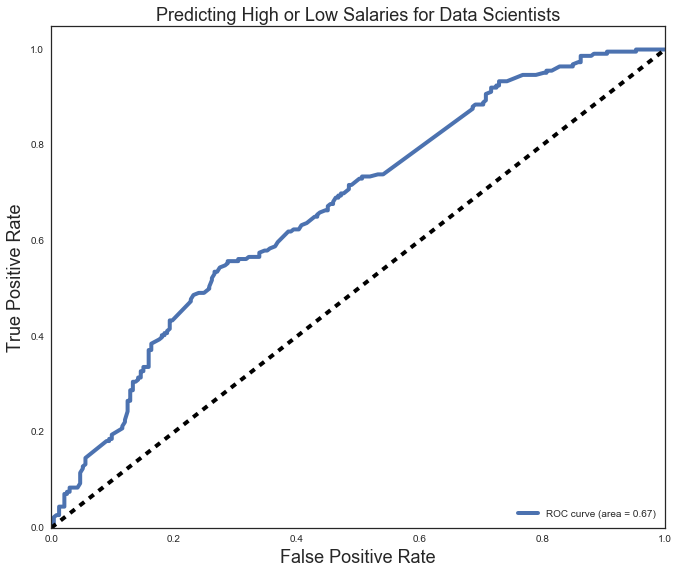

In [351]:
Y_score = model8b.decision_function(x_test8b)

FPR = dict()
TPR = dict()
ROC_AUC = dict() # {}

# For class 1, find the area under the curve

print roc_curve(y_test8b, Y_score)

FPR[1], TPR[1], _ = roc_curve(y_test8b, Y_score)  ## changes the false positive rate
ROC_AUC[1] = auc(FPR[1], TPR[1])


# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Predicting High or Low Salaries for Data Scientists', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Report

## Data Scientist Salary Prediction

Prepared by Chris Eppig, Ph.D.

### Introduction:

The client is interested in the factors that lead to high salary for data scientists. $80,000 per year was the cutoff point for what was considered high salary—this is a reasonable average for entry-level data science positions. 


### Data collection:

Data was scraped from job postings on Indeed.com using BeautifulSoup. Because actual salaries were very uncommon in this dataset, Indeed.com’s salary estimator was used to collect data at four levels: $50,000, $70,000, $90,000, and $120,000. The two lower salaries were coded as low salary (0), and the two higher salaries were coded as high salary (1). The four data frames were concatenated and exported as a data frame (see: indeed_data.csv). 


### Data cleaning:

As scraped, the data required very little cleaning, except to remove errant characters and whitespace.


### Variable creation:

Four categories of data were used to build models:
1) Variables based on job title.
2) Variables based on the company the jobs were posted by.
3) Variables based on the location of the jobs.
4) Variables based on the job descriptions.
Variables were created manually for the variables that intuitively seemed to be predictive of salary: the most common cities that jobs were posted in, and basic information about job titles (e.g. data scientist, analyst, and senior and junior level postings). 
A correlation matrix with heatmap was used as a preliminary method to determine whether any variables would be useful in predicting salary, but there were no associations that stood out. 

Using the feature extraction function, 50 variables each were created based on the most common words from job titles, companies, locations, and job descriptions. 

### Models:

Baseline probability for predicting high salary is 0.50, because there are the same number of data points in the high and low salary categories. As model scores go above 0.50, they have a predictive ability that is better than chance. 

Logistic models were built using the sklearn library to investigate each of the four variable areas described above. 

Model 1 used basic job title words (data scientist, junior, senior, analyst) as well as the most common cities that jobs were based in. These variables were selected using intuition, with the understanding that more variables would be selected later, using more intelligent selection criteria.
Although the correlation matrix did not suggest any useful variables, this model performed better than chance (score = 0.58).  The confusion matrix indicates that the model is better at predicting negatives than it is at predicting positives, but is still better than chance at both predictions.

Model 3 used the 50 most common words from the company names to predict high salary; no other variables were used. The model score was 0.55.
Model 4 used the 50 most common words from job titles to predict salary. The model score was 0.59.
Model 5 used the 50 most common location words to predict salary. The model score was  0.59.
Model 7 used the 50 most common job description words to predict salary. The model score was 0.58.

Model 6 used all 200 extracted features in the same mode. The model score was 0.65, and the confusion matrix showed a slightly better ability to detect positive outcomes than negative outcomes. False negatives and false positives were roughly equal.
This model was both the most predictive model yet, and had the most number of variables predicting salary. For these reasons, model 6 was selected for a test-train-split. The training set of 1377 rows had a model score of 0.66, but the test set was barely above chance (score = 0.54), indicating a high level of over-fit. This is not particularly surprising, given that there are only twice as many rows of data in the test set as there are variables. 

These 6 models serve 2 main functions: they show the relative predictive ability of the four types of variables, and the coefficients of these models indicate which variables in each class are most important for predicting salary. Using the coefficients from models 3, 4, 5, and 7, a list of important variables was compiled from all of the variable types. These 60 variables were used as predictors in model 8.

Model 8 used both L1 (lasso; model 8a) and L2 (ridge; model 8b) regularization. At C=1, both models performed identically (score = 0.62). Setting C=0.1 allowed the two models to diverge (model 8a score = 0.59, model 8b score = 0.62). 
The lasso regularization dropped 52 of the variables from the model. Of the remaining 8, only 4 had coefficients with an absolute value higher than 0.1. The ridge regularization left all of the variables in the model, and 40 of them had coefficients with an absolute value higher than 0.1. 

Recall score for model 8b is 0.62,  indicating that it is 62% accurate at predicting that a high salary is high. The precision score for model 8b is also 0.62, meaning that 62% of the model predictions of high salary are true high salaries. The confusion matrix indicates that false positives and false negatives are equally likely. 

Model 8b, as the better model, was chosen for a test-train-split. The training model score was 0.63, and the test model score was 0.58. This model appears to suffer from a small degree of over-fitting, but the test model is still a relatively good predictor of salary compared to previous models. 

A grid search was performed using the variables from model 6. Using all 200 extracted variables gave the grid search maximum variability to work with to find the best model. 
The grid search was given three parameters to manipulate: lasso or ridge regularization, 6 values for C, and using or not using an intercept. 
The best model used C=0.01, an intercept, and and ridge regularization. The final score for this model was 0.62, which is the same score as was found in model 8b. The confusion matrix and classification report for the grid search model are also nearly identical to model 8b.


### Conclusions:

According to the best models presented here, the most important factors for predicting high salary are a job that includes “director,” “principal,” or “quantitative” in the job title or description. The most important factor for predicting low salary is a job title or description containing the word “analyst.” Although location variables were present in the best models, they were not as important as the job description and title. Contrary to common wisdom, “Apple,” “Uber,” “Facebook,” “DC,” and “Chicago” either had no ability to predict high salary, or negatively predicted it. 
Although the best models presented here have an ability to predict salary that is better than chance, their predictive power is fairly low. A better analysis would use actual instead of estimated salary—this is likely the largest source of noise in the model. This dataset was also skewed fairly highly towards the Chicago area, which made up about 10% of the jobs. A better analysis would use more data from other locations, with specific attention to the top areas for the IT sector, including San Fransisco, Seattle and Los Angeles. A more advanced modeling technique may also be able to capture variation that was not accounted for here. Finally, more data could allow for more variables to be used, and allow more complex relationships to be discovered. 